<a href="https://colab.research.google.com/github/jkm243/50projects50days/blob/main/TSOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt


In [ ]:
# Размер изоброжение
largeur_image = 50
hauteur_image = 50


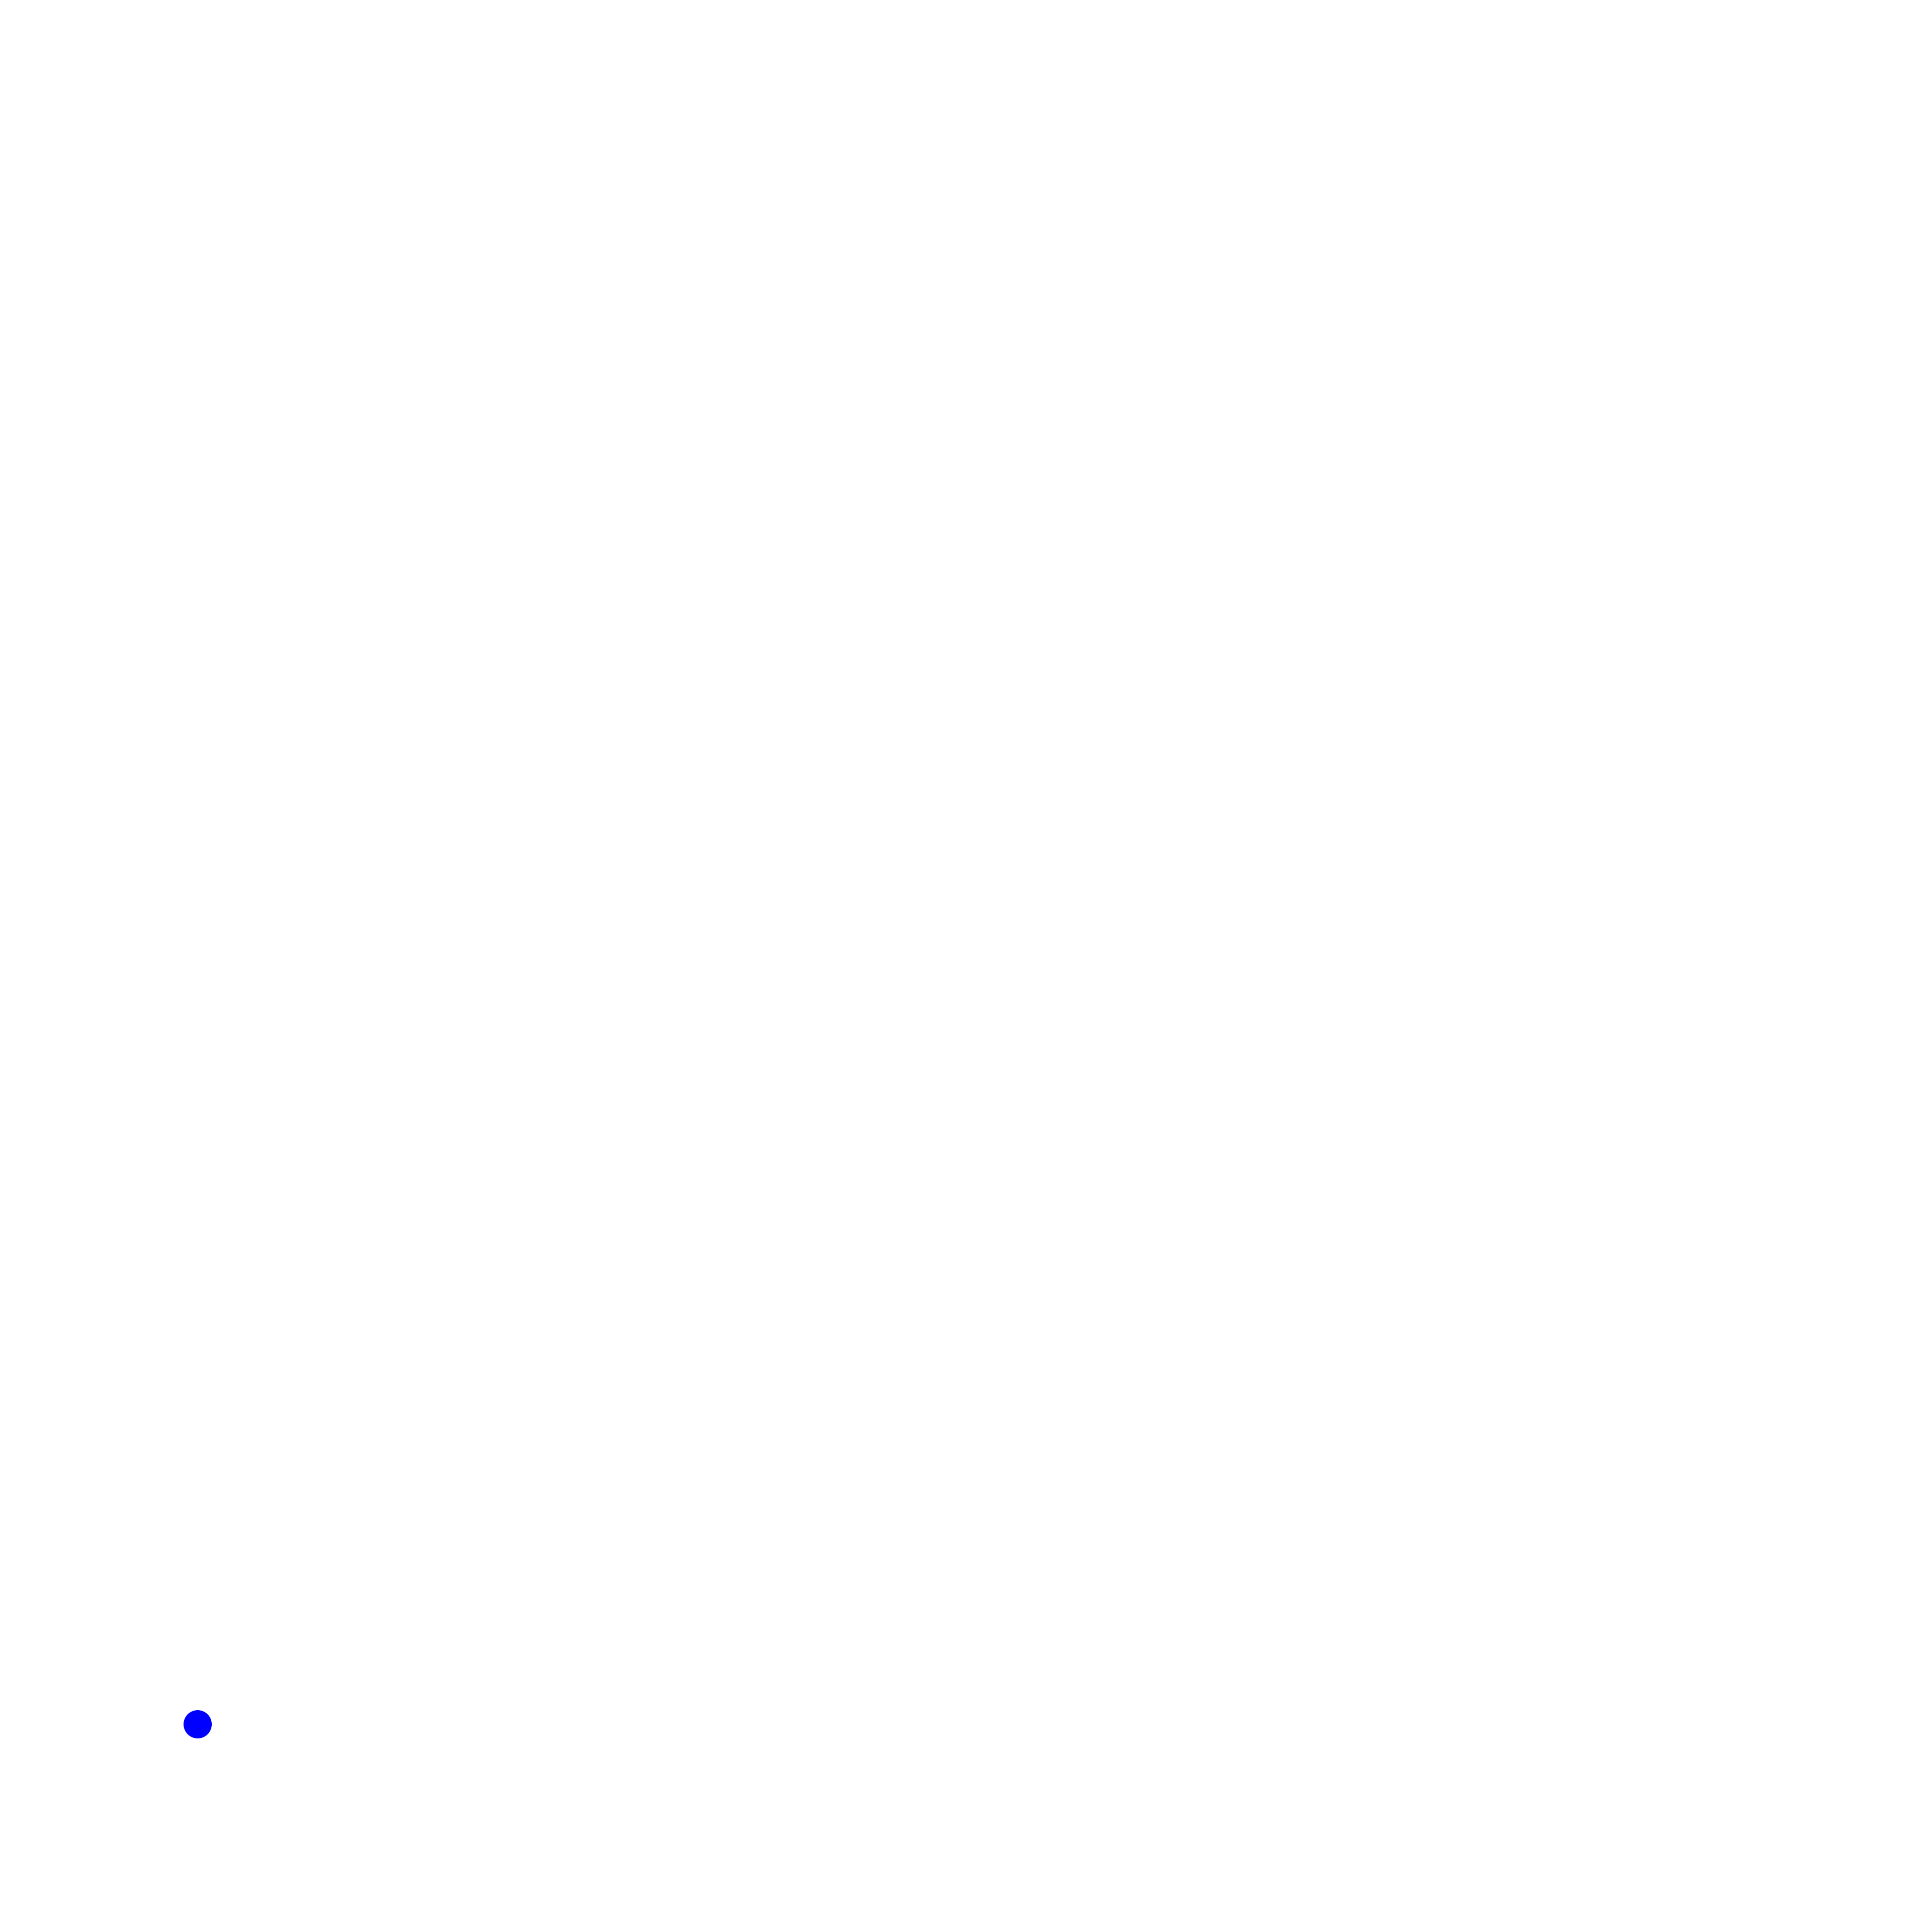

In [ ]:
# Создайте фигуру и ось
fig, ax = plt.subplots(figsize=(largeur_image, hauteur_image))

# Установить пределы оси
ax.set_xlim(0, largeur_image)
ax.set_ylim(0, hauteur_image)

# Placer un point aux coordonnées (x, y)
x = 5
y = 5
ax.plot(x, y, 'bo', markersize=40)
ax.axis('off')

# save image
plt.savefig("figure_image1.jpg", bbox_inches='tight', pad_inches=0)



## **1. Génération des images et des annotations**

Nous allons commencer par générer les images avec des points aléatoires et enregistrer les coordonnées comme précédemment.


In [ ]:
import matplotlib.pyplot as plt
import random
import os

# Créer un dossier pour enregistrer les images
os.makedirs("dataset_images", exist_ok=True)

# Fichier pour enregistrer les annotations
with open("annotations.txt", "w") as annotation_file:
    # Ensemble pour stocker des coordonnées uniques
    coord_set = set()

    for i in range(10000):
        # Générer des coordonnées aléatoires uniques dans l'intervalle [0, 500)
        while True:
            x = random.randint(0, 499)  # Coordonnée x entre 0 et 499
            y = random.randint(0, 499)  # Coordonnée y entre 0 et 499
            if (x, y) not in coord_set:  # Vérifier si les coordonnées sont uniques
                coord_set.add((x, y))
                break

        # Créer une figure avec des dimensions de 5x5 pouces
        fig = plt.figure(figsize=(5, 5))  # Dimensions de l'image en pouces

        # Placer le point aux coordonnées (x, y) normalisées pour [0,1]
        plt.plot(x / 500, y / 500, 'bo', markersize=20)  # Normaliser x et y

        # Définir les limites de l'axe
        plt.xlim(0, 1)  # Limites de l'axe X
        plt.ylim(0, 1)  # Limites de l'axe Y

        # Désactiver les axes
        plt.axis('off')

        # Enregistrer l'image avec le point dessiné
        filename = f"dataset_images/image_{i+1}.png"
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

        # Écrire les coordonnées dans le fichier d'annotations
        annotation_file.write(f"{filename}: ({x}, {y})\n")

        # Fermer la figure pour éviter d'afficher quoi que ce soit
        plt.close(fig)

print("Images et annotations créées avec succès.")


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# **2. Préparation des données**

Nous allons charger les images et les annotations pour préparer les données pour l'entraînement.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Charger les images et les annotations
def load_data(image_folder='dataset_images', annotation_file='annotations.txt'):
    images = []
    labels = []

    with open(annotation_file, 'r') as f:
        for line in f:
            parts = line.split(':')
            image_path = parts[0].strip()
            coords = parts[1].strip().split('(')[1].split(')')[0].split(',')
            x = float(coords[0]) / 500  # Normaliser x
            y = float(coords[1]) / 500  # Normaliser y

            # Charger l'image
            img = load_img(image_path, target_size=(224, 224))  # Redimensionner à 224x224
            img_array = img_to_array(img) / 255.0  # Normaliser les pixels

            images.append(img_array)
            labels.append([x, y])  # Ajouter les coordonnées normalisées

    return np.array(images), np.array(labels)

images, labels = load_data()
print(f"Loaded {len(images)} images and corresponding labels.")


Loaded 100 images and corresponding labels.


# **3. Création du modèle**

Nous allons créer un modèle de réseau de neurones convolutif (CNN).

In [ ]:
from tensorflow.keras import layers, models

# Créer le modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)  # Sortie pour les coordonnées x et y
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **4. Entraînement du modèle**

Nous allons entraîner le modèle sur les données préparées.
python

In [ ]:
# Entraîner le modèle
model.fit(images, labels, epochs=100, validation_split=0.2)

# Sauvegarder le modèle
model.save('model.h5')
print("Model trained and saved successfully.")


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0828 - val_loss: 0.1016
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0856 - val_loss: 0.0848
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 0.0891 - val_loss: 0.1022
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.0828 - val_loss: 0.0849
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0848 - val_loss: 0.0983
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 0.0776 - val_loss: 0.1256
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - loss: 0.1022 - val_loss: 0.0839
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - loss: 0.0772 - val_loss: 0.0915
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0732 - val_loss: 0.0859
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 0.0621 - val_loss: 0.0693
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - loss: 0.0597 - val_loss: 0.0998
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 0.0528 - val_loss: 0.0669
Ep

Model trained and saved successfully.


# **5. Tester le modèle**

Pour tester le modèle sur une nouvelle image :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


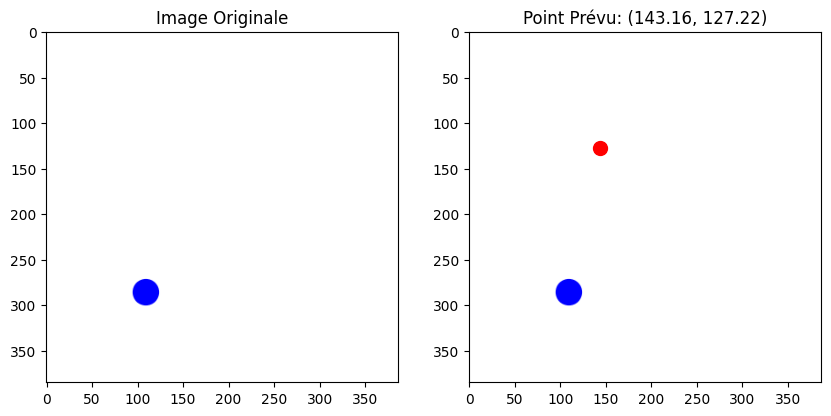

In [ ]:
def predict_point(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0   # Normaliser les pixels
    img_array = np.expand_dims(img_array, axis=0)   # Ajouter une dimension pour le batch

    prediction = model.predict(img_array)
    return prediction[0] * 500   # Dé-normaliser les coordonnées

# Exemple d'utilisation :
image_to_test = 'dataset_images/image_20.png'   # Changez ceci pour tester d'autres images
predicted_coords = predict_point(image_to_test)

# Afficher l'image originale avec le point prédit
original_image = load_img(image_to_test)
plt.figure(figsize=(10,5))

# Image originale
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Image Originale")
plt.axis('oN')

# Image avec point prédit
plt.subplot(1, 2, 2)
plt.imshow(original_image)
plt.scatter(predicted_coords[0], predicted_coords[1], color='red', s=100)   # Afficher le point prédit en rouge
plt.title(f"Point Prévu: ({predicted_coords[0]:.2f}, {predicted_coords[1]:.2f})")
plt.axis('on')

plt.show()
